# Lineær regresjonsanalyse
*Laget av Merete, Åsne, Marthe og Kristian*


For å finne den best tilpassede linjen til et antall punkter bruker man regresjon. Vi ønsker å finne en lineær funksjon på formen $f(x)=ax+b$ , noe blant annet Geogebra klarer ved bare noen tastetrykk. Men hvordan klarer egentlig Geogebra dette? Og hva er egentlig den best tilpassede linjen?

I første del av oppgaven skulle vi finne en måte å gjøre lineær regresjon med tre punkter i planet. Men hva hadde skjedd hvis vi har mer enn 3 punkter?

I den andre delen av oppgaven skulle vi lage et brukervennlig program med mer enn 3 punkter, hvor brukeren kunne velge en liste som programmet gjorde regresjon av.

Til slutt skulle vi sammenlikne vår metode med andre metoder for regresjon

Ved regresjon av 3 punkter valgte å finne linjen som lå nærmest mulig alle punktene i y-retning. For å finne det tenkte vi at vi kunne bruke ettpunktsformelen $y-y1=a(x-x1)$ for å finne en lineær funksjon. For å bruke ettpunktsformelen trenger vi et punkt og stigningstallet til linja. Vi fant ut ved å teste mange punkter i GeoGebra at innsenteret/ tyngdepunktet/ midtpunktet i trekanten ville ligge på den beste tilpassede linjen. Derfor brukte vi midtpunktet på trekanten som det ene punktet i ettpunktsformelen. Da trengte vi bare å finne stigningstallet. 

Det gjorde vi ved at vi lagde et program som fant det minste og det største mulige stigningstallet for linja. Det gjorte vi ved å bruke minstekvadratersmetode, som er at vi finner avstanden fra punktet til linja i y-retning som vi opphøyer i annen (altså arealet av kvadratet mellom punktet og linja). Deretter testet vi alle stigningstall mellom største og minste stigningstall, for å finne når summen av arealene var minst(“brute-force-metoden”). Stigninstallet til funksjonen var derfor stigningstallet når summen av arealene var minst. 

Ved regresjon av $n$ punkter er det ikke like lett å bruke samme metode som ved regresjon av 3 punkter. Dersom vi f.eks har 4 punkter gir det ikke en like bra regresjon ved å ta midtpunktet til firkanten og deretter bruke minstekvadratersmetode. Dette er fordi midpunktet til en firkant ikke ligger på regresjonslinja til punktene:

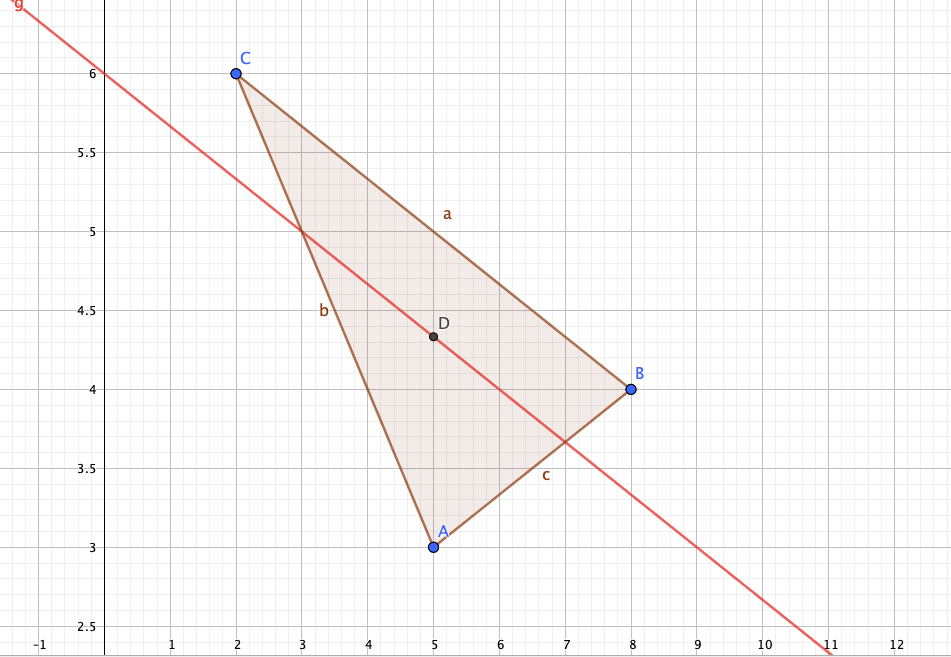

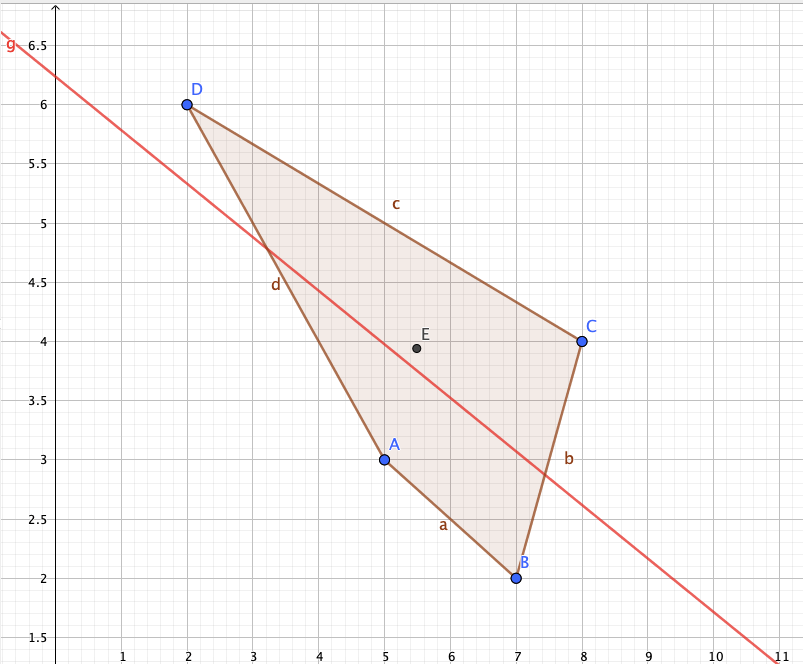

Vi tenkte derfor at vi skulle lage 3 punkter uansett hvor mange punkter vi har. Det gjorde vi ved å dele opp punktene i 3 deler, og så finner snittpunktet til de 3 ulike delene, sånn at vi sitter igjen med kun 3 punkter. Deretter brukte vi akkurat samme metode som ved regresjon av 3 punkter.

Når vi sammenligner resultatene vi fikk i forhold til Geogebra ser vi at det gir samme resultat for 3 punkter. Derimot når vi tar regresjon med over 3 punkter og vi bruker metoden med 3 snittpunkter, ser vi at det oppstår en forskjell fra vårt program og Geogebra. 

Alt i alt finnes det nok en enklere måte å programmere et program som regner ut regresjon, men for å få til det må man bruke mattekunnskaper vi ikke har enda. Så derfor gjorde vi det kanskje på en litt tungvint måte, men vi skapte ihvertfall noe eget. Hvis man ønsker å finne regresjon av noen punkter man ikke har en csv-fil til, vil nok Geogebra være et like godt alternativ som vårt program. Hvis man derimot har en liste med punkter, vil vårt program fungere bedre enn Geogebra ved at brukeren bare trenger å skrive inn navnet på lista og så regner programmet ut regresjon fra den.

### Importerer de ulike pakkene som brukes i programmet:

In [1]:
import numpy as np
import time
import sys
import pandas as pd
import matplotlib.pyplot as plt

### Definerer variablene i programmet:

In [2]:
global xp #liste med x-veridene til punktene, sammenhengende x og y har samme index
global yp #liste med y-verdiene til punktene, sammenhengende x og y har samme index
global minapl #minste sum av arealene til avstand mellom punktene-linje
global apl #avstandpunktlinje
global stigmin #minste stigningstall mellom 2 av punktene 
global stigmax #største stigningstall mellom 2 av punktene 
global stig #beste stigningstall
global xmp #x-verdi for midtpunktet i trekanten mellom de tre punktene
global ymp #y-verdi for midtpunktet i trekanten mellom de tre punktene
global b #y-verdi når x=0 i den beste tilpassede linjen

In [3]:
xp=[] #Lager en tom liste
yp=[] #Lager en tom liste 
sumavstand=[0,0,0] #Lager en tom liste med 3 verdier
minapl=1000000000000 #Setter minste sum av arealene til avstanden mellom punktene og linjen som et høyt tall 
                     #ettersom tallet skal bli minst mulig utover i programmet
stig=0 
b=0
antallp=10

### Definerer funksjoner for estetikk:

In [6]:
#setter en kunstpause mellom handlinger
def tid(tid):
    time.sleep(tid)

#mellomrom mellom tekst
def mellomrom(ganger):
    for x in range(ganger):
        print("")

#printer en skillestrek
def strek():
    mellomrom(1)
    print("----------------------------------------------------------------")
    mellomrom(1)

#skriver et tegn/bokstav av gangen
def skriv(s):
    for c in s:
        sys.stdout.write(c)
        sys.stdout.flush()
        time.sleep(0.09)
    mellomrom(1)
    tid(2)

### Definerer de ulike funksjonene som brukes:

In [4]:
#funksjon hvor brukerern velger om hen vil bruke en liste eller skrive inn punktene selv
def valg():
    global xp
    global yp
    fornoyd='nei'
    
    while True:
        sl=input('Vil du skrive inn punktene selv eller hente en liste? svar:(skrive/liste)   ')
        strek()
        if sl=='skrive' or sl=='Skrive':
            antallp=int(input('Hvor mange punkter skal du bruke i regresjonen?   '))
            strek()
            xp=[]
            yp=[]
            for x in range(antallp):
                print('Hva er x-verdien til punkt', (x+1),'?')
                xp.append(float(input("")))
                print('Hva er y-verdien til punkt', (x+1),'?')
                yp.append(float(input("")))
                strek()
            fornoyd=input('Er du fornøyd med punktene? ja/nei   ')
            if fornoyd =='ja':
                break
            else:
                print('Skriv inn på nytt...')


        elif sl=='liste'or sl=='Liste':
            filnavn=input("Hva heter filen din? (Pass på at den ligger i samme mappe i Jupyter Notebook som dette programmet, og husk .csv på slutten)")
            liste=pd.read_csv(filnavn)

            xliste=liste.pop("x") #fjerner y-verdiene fra listen, for å få x-verdier i egen liste
            yliste=liste.pop("y") #fjerner x-verdiene fra listen, for å få y-verdier i egen liste
            antallp=len(xliste)
            for i in range(antallp):
                xp.append(xliste[i])
                yp.append(yliste[i])
            break
    

In [21]:
#funksjon som lager 3 snittpunkter av punktene som blir oppgitt av brukeren
#kjører kun når antall punkter er over 3
def snittpunkt():
    global snittpx
    global snittpy
    global bolker
    global minx
    global maxx
    
    maxx=max(xp)
    minx=min(xp)
    
    bolk1=((maxx-minx)/3)+minx
    bolk2=(2*((maxx-minx)/3))+minx
    bolk3=maxx
    
    bolker=[(minx-1),bolk1, bolk2, bolk3]
    snittpx=[]
    snittpy=[]

    for k in range(1,4):
        snittx=0
        snitty=0
        antall=0
        for j in range(len(xp)):
            if xp[j]<= bolker[k]:
                if xp[j] > bolker[k-1]:
                    snittx+=xp[j]
                    snitty+=yp[j]
                    antall+=1
        snittpx.append((snittx/antall))
        snittpy.append((snitty/antall))

In [7]:
#finner midtpunktet til trekanten til de 3 punktene 
def mp(x,y): 
    global xmp
    global ymp
    
    xmp=float(x[0]+x[1]+x[2])/3
    ymp=float(y[0]+y[1]+y[2])/3

In [9]:
#finner minste stigningstall som er mulig
def smin(x,y):
    global stigmin
    stig1=(y[1]-y[0])/(x[1]-x[0])
    stig2=(y[2]-y[1])/(x[2]-x[1])
    stig3=(y[2]-y[0])/(x[2]-x[0])
    if stig1<=stig2 and stig1<=stig3:
        stigmin=stig1
    elif stig2<=stig1 and stig2<=stig3:
        stigmin=stig2
    elif stig3<=stig1 and stig3<=stig2:
        stigmin=stig3

In [10]:
#finner største stigningstall som er mulig
def smax(x,y):
    global stigmax
    stig1=(y[1]-y[0])/(x[1]-x[0])
    stig2=(y[2]-y[1])/(x[2]-x[1])
    stig3=(y[2]-y[0])/(x[2]-x[0])
    if stig1>=stig2 and stig1>=stig3:
        stigmax=stig1
    elif stig2>=stig1 and stig2>=stig3:
        stigmax=stig2
    elif stig3>=stig1 and stig3>=stig2:
        stigmax=stig3

In [8]:
#funksjon for å regne ut y-verdier på linjen med midtpunkt, bruker ettpunktsformelen 
def ettpunktformel(a,x):
    y=a*(x-xmp)+ymp
    return y

In [22]:
#finner den minste summen av arealene ved å ta avstanden fra punktene til linjen og kvadere dem
#stigningstallet til linjen blir det stigningstallet som gir minst arealsum
def avstand(x, y):
    global minapl
    global stig
    
    if stigmin!=stigmax:
        for k in np.arange(stigmin, stigmax, 0.001):
            apl=0

            for i in range(len(x)):
                apl+=abs((ettpunktformel(k,(x[i]))-y[i])**2)
            if apl<minapl:
                minapl=apl
                stig=float(k)
    else:
        stig=stigmin

In [12]:
#regner ut b, altså skjæringspunktet mellom y-aksen og linja
def b_verdi():
    global b
    
    b=funksjon(stig,0)
    return b

In [13]:
#funksjon for å finne y-verdier til linja i rutenettet
def y_funksjon(a,x,b):
    y=a*x+b
    return y

In [14]:
#velger størrelse og farge på punktene
def punkter(x,y):
    plt.scatter(x,y,color="b", marker ="o", s=30)

In [15]:
#plotter punktene og tegner grafen i grafikkfelt
def punktgraf():
    plot_x=[]
    plot_y=[]
    x_verdi=minx
    
    plt.figure(figsize=(10,10))
    while True:
        

        if x_verdi <= maxx:
            y_verdi=y_funksjon(stig,x_verdi, b)
            plot_y.append(y_verdi)
            plot_x.append(x_verdi)
            plt.plot(plot_x,plot_y, color='r')
            x_verdi+=1  
        else:
            break
    punkter(xp,yp)
    plt.grid()
    plt.show()

In [16]:
#skriver ut funksjonsuttrykket til regresjonen av punktene
def linje(a,b):
    strek()
    print("                    REGNER UT REGRESJON                    ")
    strek()
    tid(2)
    print("Den beste tilpassete linjen for punktene er:")
    print("")
    print("")
    skriv ('.....')
    skriv ('.....')
    print("")
    print("")
    if b!=0:
        print ('y =', a, '* x +', b)
    else:
        print ('y =', a, '* x')

In [20]:
#Funksjon som kjører alle funksjonene avhengig av om det er 3 eller flere punkter
def main():
    valg()
    if antallp==3:

        mp(xp,yp)
        smin(xp,yp)
        smax(xp,yp)

        avstand(xp,yp)
    elif antallp>3:
        snittpunkt()

        mp(snittpx,snittpy)
        smax(snittpx,snittpy)
        smin(snittpx,snittpy)

        avstand(snittpx,snittpy)

    b_verdi()
    linje(stig, b)
    punktgraf()

### Kjører alle funksjonene for å finne linjen og vise det i grafikkfelt

Vil du skrive inn punktene selv eller hente en liste? svar:(skrive/liste)   liste

----------------------------------------------------------------

Hva heter filen din? (Pass på at den ligger i samme mappe i Jupyter Notebook som dette programmet, og husk .csv på slutten)prosjekt.csv

----------------------------------------------------------------

                    REGNER UT REGRESJON                    

----------------------------------------------------------------

Den beste tilpassete linjen for punktene er:


.....
.....


y = 1.014615659911224 * x + -0.47841666753966194


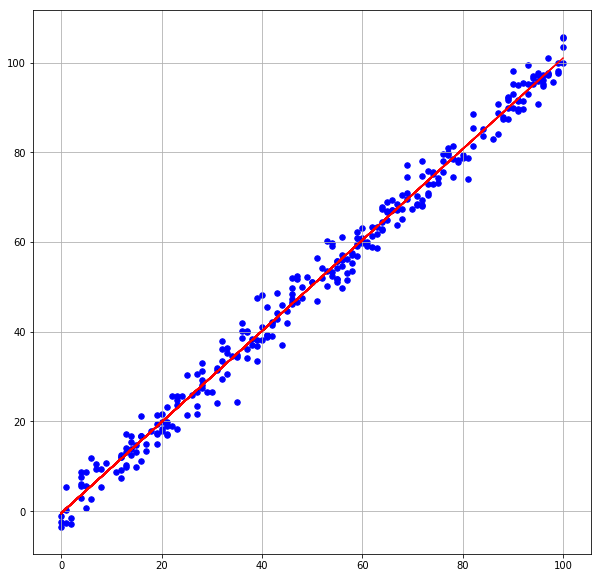

In [18]:
main()

In [19]:
print(stig)
print(stigmax)
print(stigmin)

1.014615659911224
1.0169875903470456
1.0116156599112243
